# Detection of 2D Ising phase transition via CNN

* ref: https://arxiv.org/pdf/1609.09087.pdf

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from data import make_train_data

## Loading data

In [3]:
data = make_train_data(os.getcwd()+'/IMG_16', tempset=100) 

In [4]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Lavel-set:\t\t{}".format(len(data.train.images)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Lavel-set:\t\t{}".format(len(data.test.labels)))

Size of:
- Training-set:		25600
- Lavel-set:		25600
- Test-set:		6400
- Lavel-set:		6400


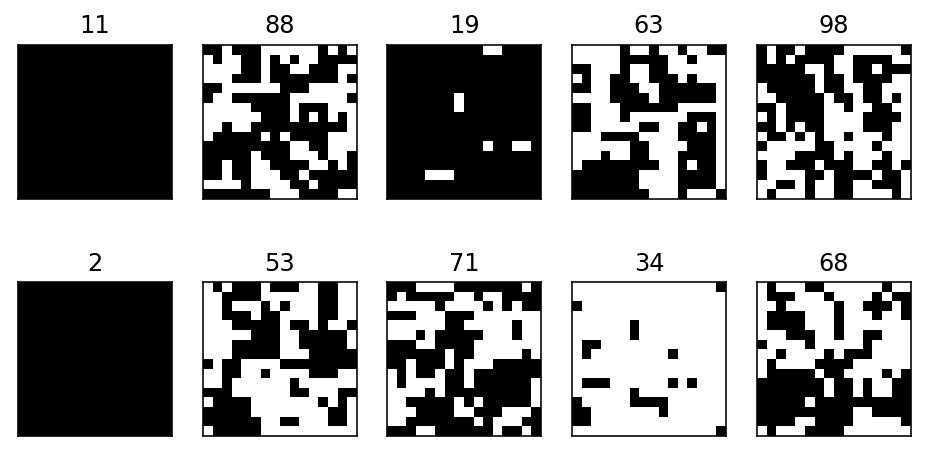

In [5]:
images = data.train.images[0:10]
labels = data.train.labels[0:10]

fig = plt.figure(figsize=(8,4))
for c, (image, label) in enumerate(zip(images, labels)):
    subplot = fig.add_subplot(2,5,c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(label))
    subplot.imshow(image.reshape((16,16)), vmin=0, vmax=1,cmap='gray', interpolation="none")

# Configuration of CNN

In [7]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [8]:
import tensorflow.keras
tensorflow.keras.__version__

'2.2.4-tf'

In [9]:
# Params

lattice_size = 16
num_class = 100

In [10]:
from tensorflow.keras import layers

def build_cnn(lattice_size, num_class):

    input_shape = (lattice_size, lattice_size, 1) 
    x = layers.Input(input_shape)
    h = layers.Conv2D(5, (3,3), strides=(4,4), padding='same')(x)
    h = layers.ReLU()(h)
    h = layers.Flatten()(h)
    h = layers.Dense(num_class)(h)
    y = layers.Activation('softmax')(h)
    
    model = tf.keras.Model(x, y)
    return model

In [11]:
model = build_cnn(lattice_size, num_class)

model.summary()

model.compile(loss='categorical_crossentropy', 
              optimizer=tf.optimizers.Adam(1.0e-4), 
              metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16, 16, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 4, 5)           50        
_________________________________________________________________
re_lu (ReLU)                 (None, 4, 4, 5)           0         
_________________________________________________________________
flatten (Flatten)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               8100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
Total params: 8,150
Trainable params: 8,150
Non-trainable params: 0
___________________________________________________________

In [12]:
data.train.images = data.train.images.reshape(data.train.images.shape[0], lattice_size, lattice_size, 1).astype('float32')
data.test.images = data.test.images.reshape(data.test.images.shape[0], lattice_size, lattice_size, 1).astype('float32')

In [13]:
# 10,000 iterations
history = model.fit(data.train.images, data.train.labels,
                    batch_size=256,
                    epochs=100,
                    verbose=1)#,
                    #validation_split=0.1)

Train on 25600 samples
Epoch 1/100
25600/25600 [==============================] - 1s 54us/sample - loss: 4.6189 - accuracy: 0.0101
Epoch 2/100
25600/25600 [==============================] - 1s 25us/sample - loss: 4.6103 - accuracy: 0.0099
Epoch 3/100
25600/25600 [==============================] - 1s 24us/sample - loss: 4.6022 - accuracy: 0.0105
Epoch 4/100
25600/25600 [==============================] - 1s 23us/sample - loss: 4.5936 - accuracy: 0.0123
Epoch 5/100
25600/25600 [==============================] - 1s 22us/sample - loss: 4.5832 - accuracy: 0.0186
Epoch 6/100
25600/25600 [==============================] - 1s 23us/sample - loss: 4.5695 - accuracy: 0.0183
Epoch 7/100
25600/25600 [==============================] - 1s 23us/sample - loss: 4.5561 - accuracy: 0.0171
Epoch 8/100
25600/25600 [==============================] - 1s 23us/sample - loss: 4.5428 - accuracy: 0.0178
Epoch 9/100
25600/25600 [==============================] - 1s 23us/sample - loss: 4.5288 - accuracy: 0.0183
Epoch

25600/25600 [==============================] - 0s 9us/sample - loss: 4.1004 - accuracy: 0.0463
Epoch 77/100
25600/25600 [==============================] - 0s 9us/sample - loss: 4.0979 - accuracy: 0.0464
Epoch 78/100
25600/25600 [==============================] - 0s 9us/sample - loss: 4.0953 - accuracy: 0.0468
Epoch 79/100
25600/25600 [==============================] - 0s 9us/sample - loss: 4.0928 - accuracy: 0.0470
Epoch 80/100
25600/25600 [==============================] - 0s 9us/sample - loss: 4.0903 - accuracy: 0.0473
Epoch 81/100
25600/25600 [==============================] - 0s 9us/sample - loss: 4.0879 - accuracy: 0.0474
Epoch 82/100
25600/25600 [==============================] - 0s 9us/sample - loss: 4.0854 - accuracy: 0.0477
Epoch 83/100
25600/25600 [==============================] - 0s 9us/sample - loss: 4.0830 - accuracy: 0.0482
Epoch 84/100
25600/25600 [==============================] - 0s 9us/sample - loss: 4.0806 - accuracy: 0.0482
Epoch 85/100
25600/25600 [===============

In [14]:
score = model.evaluate(data.test.images, data.test.labels, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 4.117247642278671
Test accuracy: 0.03203125


In [20]:
model.save('./weights/cnn_model.h5')

In [21]:
def plot_history(history):
    plt.figure()
    plt.plot(history.history['accuracy'], marker='.')
    #plt.plot(history.history['val_accuracy'], marker='.')
    plt.title('accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    #plt.legend(['train', 'val'], loc='upper left')

    plt.figure()
    plt.plot(history.history['loss'], marker='.')
    #plt.plot(history.history['val_loss'], marker='.')
    plt.title('loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.grid()
    #plt.legend(['train', 'val'], loc='upper left')

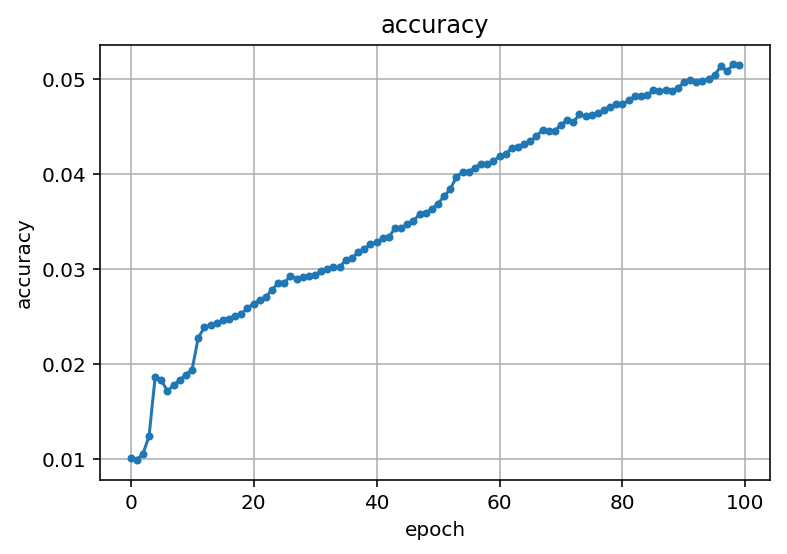

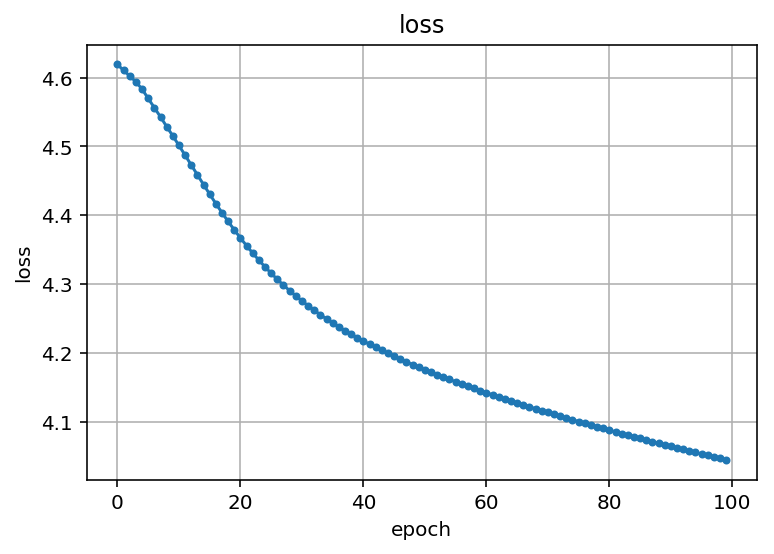

In [22]:
plot_history(history)

In [42]:
def plot_weights_Ising(weights, save=False):
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    w_min = np.min(weights)
    w_max = np.max(weights)
    
    print(weights.shape)

    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8, 14))

    im = ax1.matshow(weights, vmin=w_min, vmax=w_max, cmap=plt.cm.gray, extent=[1.0,5.0,0,80], aspect='auto', interpolation='none')
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.15)

    plt.colorbar(im, cax=cax)
    
    T = np.linspace(1.0,5.0,100)
    Wsum = [np.sum(weights[:,i]) for i in range(100)]
    ax2.plot(T,Wsum,'d')
    ax2.set_xlabel("T",fontsize=15)
    ax2.set_ylabel(r"$W_{sum}$",fontsize=15)
    ax2.set_title(r"Weights Sum $(T_c \sim 2.27)$",fontsize=15)
    ax2.grid()
    if save: plt.savefig('W_16.png', dpi = 240, tight_layout = True)

In [18]:
weights_fc = model.layers[4].get_weights()
print(weights_fc[0].shape)

(80, 100)


(80, 100)


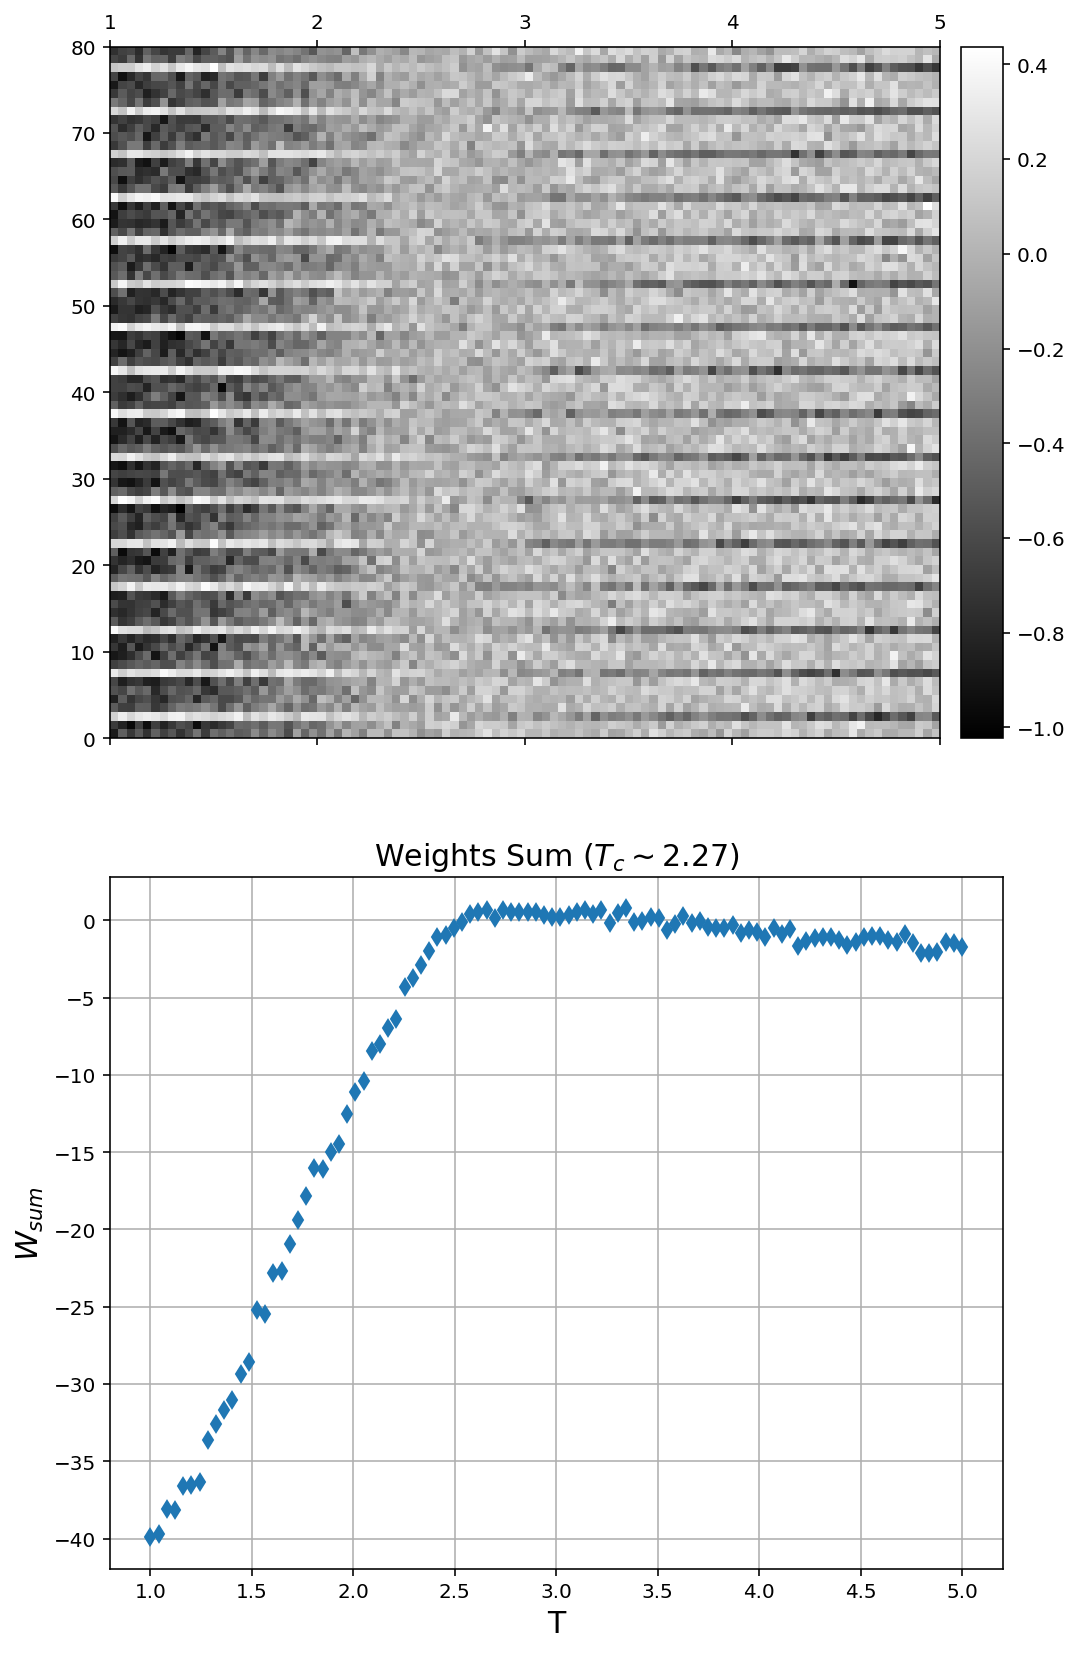

In [19]:
plot_weights_Ising(weights_fc[0])

### Load model

In [36]:
new_model = tf.keras.models.load_model('./weights/cnn_model.h5')

new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16, 16, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 4, 5)           50        
_________________________________________________________________
re_lu (ReLU)                 (None, 4, 4, 5)           0         
_________________________________________________________________
flatten (Flatten)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               8100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
Total params: 8,150
Trainable params: 8,150
Non-trainable params: 0
___________________________________________________________

In [ ]:
plot_weights_Ising(new_model.layers[4].get_weights()[0], True)